In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

import seaborn as sns
from matplotlib import style
style.use('default')

from sklearn.manifold import TSNE

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


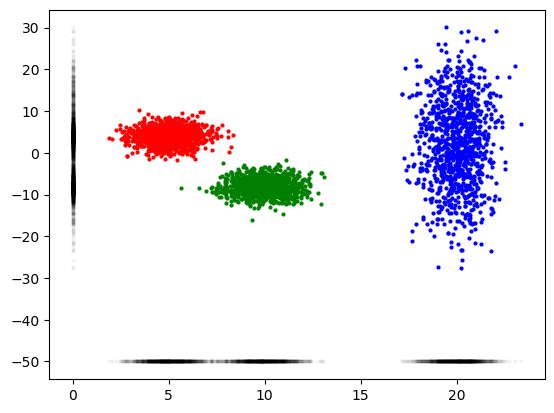

In [27]:
n = 1000
x1 = np.random.normal(5,1,n)
y1 = np.random.normal(4,2,n)

x2 = np.random.normal(10,1,n)
y2 = np.random.normal(-8,2,n)

x3 = np.random.normal(20,1,n)
y3 = np.random.normal(2,10,n)

#### main points ####
size = 4
plt.scatter(x1,y1,c='r', s = size)
plt.scatter(x2,y2,c='g', s = size)
plt.scatter(x3,y3,c='b', s = size)

#### y-axis ####
alp = 0.05
plt.scatter(np.zeros(n),y1,c = 'black', s= size, marker = 'x', alpha = alp)
plt.scatter(np.zeros(n),y2,c = 'black', s= size, marker = 'x', alpha = alp)
plt.scatter(np.zeros(n),y3,c = 'black', s= size, marker = 'x', alpha = alp)

#### x-axis ####
plt.scatter(x1,np.zeros(n)-50,c = 'black', s= size, marker = 'x', alpha = alp)
plt.scatter(x2,np.zeros(n)-50,c = 'black', s= size, marker = 'x', alpha = alp)
plt.scatter(x3,np.zeros(n)-50,c = 'black', s= size, marker = 'x', alpha = alp)

In [28]:
tsne = TSNE(2)

In [29]:
x = np.array([x1,x2,x3]).reshape(3*n,1)
y = np.array([y1,y2,y3]).reshape(3*n,1)

In [30]:
X = np.append(x,y, axis =1)
np.shape(X)

(3000, 2)

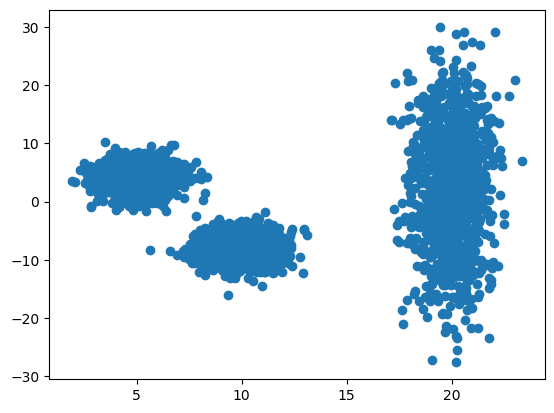

In [31]:
plt.scatter(X[:,0],X[:,1])

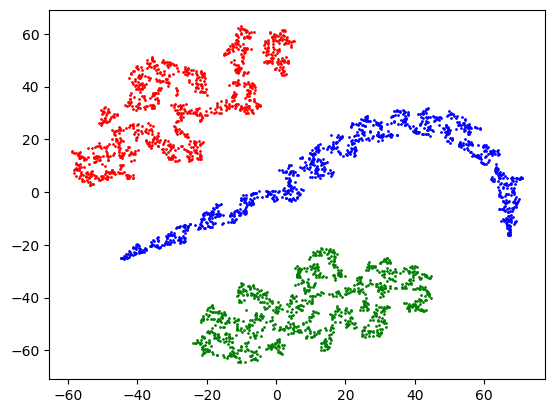

In [33]:
x = tsne.fit_transform(X)
a, b = zip(*x)
plt.scatter(a[:n],b[:n],c = 'r', s = 1)
plt.scatter(a[n:2*n],b[n:2*n],c = 'g', s = 1)
plt.scatter(a[2*n:],b[2*n:],c = 'b', s = 1)

In [38]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [39]:
tsne.fit_transform(X)
x = tsne.fit_transform(X)
a, b = zip(*x)

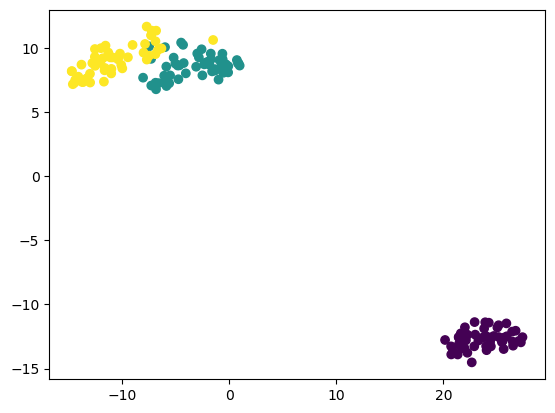

In [40]:
plt.scatter(a,b,c=Y)

In [41]:
df = pd.read_csv('./titanic/train.csv', index_col = 0)
df2 = pd.get_dummies(df.Sex, prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2['Fare'] = df.Fare
df2 = pd.concat([df2, pd.get_dummies(df.Embarked,prefix='Embarked')], axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name], index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2, pd.get_dummies(title, prefix='title')], axis=1)
df2

,Sex_female,Sex_male,Pclass,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title_Dr,title_Etc,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev
PassengerId,,,,,,,,,,,,,,,,
1,0,1,3,1,0,7.2500,0,0,1,0,0,0,0,1,0,0
2,1,0,1,1,0,71.2833,1,0,0,0,0,0,0,0,1,0
3,1,0,3,0,0,7.9250,0,0,1,0,0,0,1,0,0,0
4,1,0,1,1,0,53.1000,0,0,1,0,0,0,0,0,1,0
5,0,1,3,0,0,8.0500,0,0,1,0,0,0,0,1,0,0
6,0,1,3,0,0,8.4583,0,1,0,0,0,0,0,1,0,0
7,0,1,1,0,0,51.8625,0,0,1,0,0,0,0,1,0,0
8,0,1,3,3,1,21.0750,0,0,1,0,0,1,0,0,0,0
9,1,0,3,0,2,11.1333,0,0,1,0,0,0,0,0,1,0


In [43]:
X = df2.values

In [46]:
y = df.Survived.values

In [52]:
tsne.fit_transform(X)
x = tsne.fit_transform(X)
a, b = zip(*x)

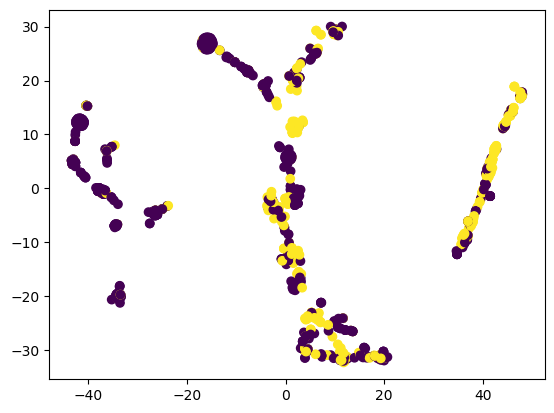

In [53]:
plt.scatter(a,b,c=y)

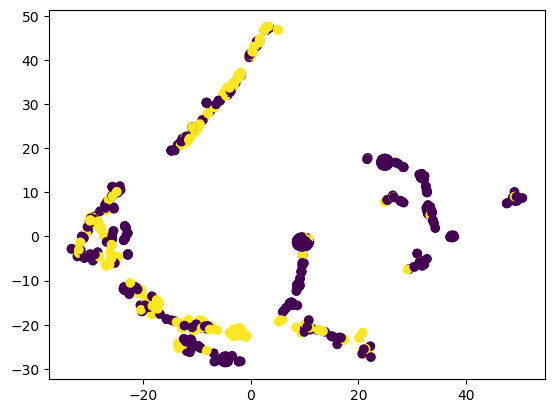

In [54]:
tsne.fit_transform(X)
x = tsne.fit_transform(X)
a, b = zip(*x)
plt.scatter(a,b,c=y)